# Data preprocessing

prépare les données avant le passage dans la machine => nettoyer,filtrer,normaliser<br>
étapes de preprocessing:
- encodage => convertir les valeurs qualitatives en valeur numérique
- normalisation => mettre toutes les valeurs sur une même échelle
- imputation => remplace des valeurs manquantes par des valeurs statistiques
- sélection => sélectionne les variables les plus utiles au dev d'un modèle
- extraction de variable => génère de nouvelle variable à partir d'info caché dans le dataset

## encodage des valeurs qualitatives

se divisent en deux catégories :

### ordinal

associe à chaque classe ou catégorie une valeur décimale unique

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder #ne permet de traiter qu'une seule colonne

In [4]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])

In [5]:
encoder = LabelEncoder()
encoder.fit_transform(y)

array([0, 1, 0, 2], dtype=int64)

In [6]:
encoder.inverse_transform(np.array([0, 0, 2, 2]))

array(['chat', 'chat', 'oiseau', 'oiseau'], dtype='<U6')

In [7]:
from sklearn.preprocessing import OrdinalEncoder

In [8]:
X = np.array([['chat', 'poils'],['chien', 'poils'], ['chat', 'poils'], ['oiseau', 'plumes']])

In [9]:
encoder = OrdinalEncoder()
encoder.fit_transform(X)

array([[0., 1.],
       [1., 1.],
       [0., 1.],
       [2., 0.]])

pose problème pour les machines learnings car pas de sens de hiérarchiser des valeurs sauf pour ceux basé sur des arbres de descisions (pas affecté) <br>
résolu par l'encodage one-hot

### one-hot

les catégories ou classe sont encodés de manière binaire dans une colonne qui lui est propre

In [10]:
from sklearn.preprocessing import LabelBinarizer

In [134]:
y = np.array(['chat', 'chien', 'chat', 'oiseau'])
encoder = LabelBinarizer(sparse_output=True) #sparse_output créé un tableau compressé
encoder.fit_transform(y)

<4x3 sparse matrix of type '<class 'numpy.int32'>'
	with 4 stored elements in Compressed Sparse Row format>

In [12]:
from sklearn.preprocessing import OneHotEncoder

In [13]:
X = np.array([['chat', 'poils'],['chien', 'poils'], ['chat', 'poils'], ['oiseau', 'plumes']])

In [135]:
encoder = OneHotEncoder() #créé par défaut un tableau compressé
encoder.fit_transform(X)

<891x384 sparse matrix of type '<class 'numpy.float64'>'
	with 12474 stored elements in Compressed Sparse Row format>

attention => ne peut pas prendre en compte de nouvelles catégories/classes si rencontré dans le train_set

## normalisation des valeurs valeurs quantitatives

### transformation MinMax

transforme chaque valeur pour qu'elle soit comprise entre 0 et 1

In [15]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
X = np.array([[70], [80], [120]])

In [25]:
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0. ],
       [0.2],
       [1. ]])

In [26]:
X_test = np.array([[90]])
scaler.transform(X_test)

array([[0.4]])

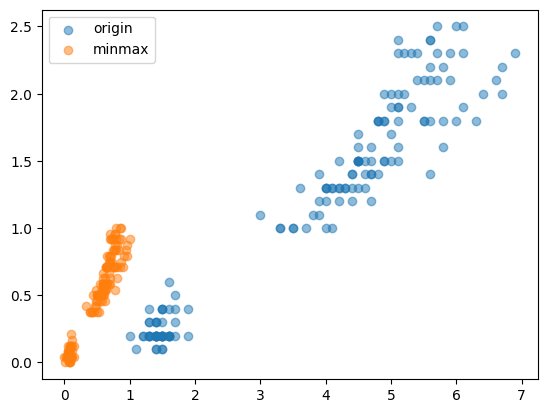

In [27]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

X_minmax = MinMaxScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5, label = "minmax")
plt.legend()

## standardScaler

In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
X = np.array([[70], [80], [120]])

In [30]:
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-0.9258201 ],
       [-0.46291005],
       [ 1.38873015]])

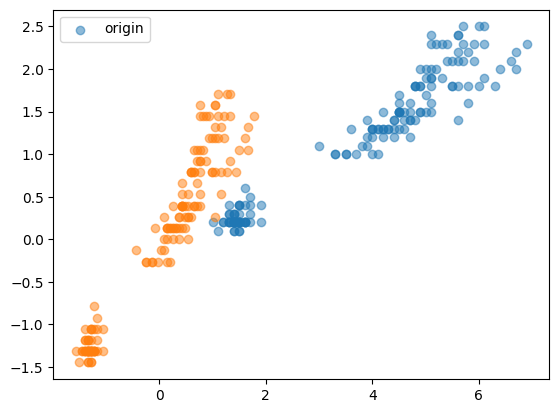

In [31]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5)
plt.legend()

attention => les deux techniques sont sensibles aux valeurs aberrantes (outliers)

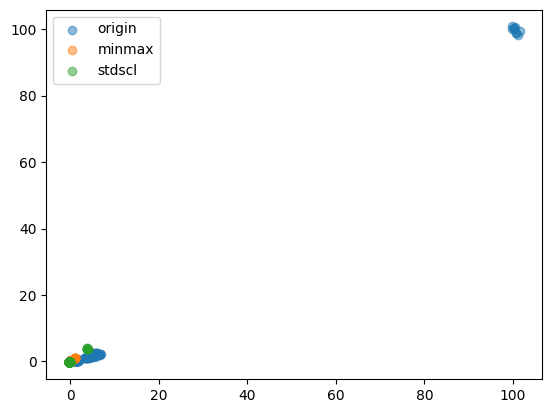

In [33]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5, label='minmax')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5, label='stdscl')

plt.legend()

### robustScaler

peu sensible aux valeurs aberrantes

In [34]:
from sklearn.preprocessing import RobustScaler

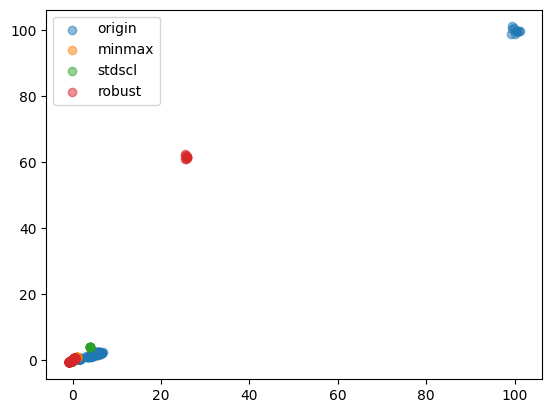

In [35]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data

outliers = np.full((10, 4), 100) + np.random.randn(10, 4)
X = np.vstack((X, outliers))

X_minmax = MinMaxScaler().fit_transform(X)
X_stdscl = StandardScaler().fit_transform(X)
X_robust = RobustScaler().fit_transform(X)

plt.scatter(X[:, 2], X[:, 3], alpha = 0.5, label='origin')
plt.scatter(X_minmax[:,2], X_minmax[:,3], alpha=0.5, label='minmax')
plt.scatter(X_stdscl[:,2], X_stdscl[:,3], alpha=0.5, label='stdscl')
plt.scatter(X_robust[:,2], X_robust[:,3], alpha=0.5, label='robust')
plt.legend()

## autres transformers présent dans le module preprocessing

### polynomialFeatures

créer des variables polymoniales à partir des valeurs existantes => feature engineering => permet de créer des modèles plus riches et plus sûrs

In [36]:
from sklearn.preprocessing import PolynomialFeatures

In [37]:
X = np.array([[1], [2], [0.5]])

In [38]:
PolynomialFeatures(3).fit_transform(X)

array([[1.   , 1.   , 1.   , 1.   ],
       [1.   , 2.   , 4.   , 8.   ],
       [1.   , 0.5  , 0.25 , 0.125]])

exemple avant/après

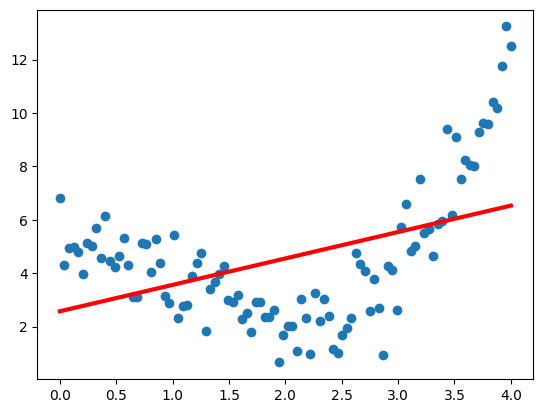

In [39]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

model = LinearRegression().fit(X, y)
y_pred = model.predict(X)

plt.plot(X, y_pred, c='r', lw=3)

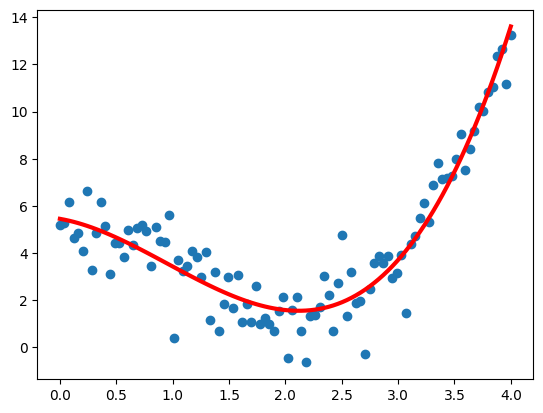

In [46]:
from sklearn.linear_model import LinearRegression

X = np.linspace(0, 4, 100).reshape((100, 1))
y = X**2 + 5*np.cos(X) + np.random.randn(100, 1)

plt.scatter(X, y)

X_poly = PolynomialFeatures(3).fit_transform(X)

model = LinearRegression().fit(X_poly, y)
y_pred = model.predict(X_poly)

plt.plot(X, y_pred, c='r', lw=3)

attention => ne pas oublier de normaliser les données après avoir utilisé polynomialFeatures

# Pipeline

associe un transformer(normalisation) et un estimator(entrainement) => composite estimator

In [47]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier

In [63]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


sans pipeline

In [64]:
scaler = StandardScaler()
X_train_transformed = scaler.fit_transform(X_train)

model = SGDClassifier(random_state=0)
model.fit(X_train_transformed, y_train)

X_test_transformed = scaler.transform(X_test)
model.predict(X_test_transformed)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 1, 0, 0, 1, 1, 0])

avec pipeline

In [68]:
model = make_pipeline(StandardScaler(), SGDClassifier())

In [69]:
model.fit(X_train, y_train)
model.predict(X_test)

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
model = make_pipeline(PolynomialFeatures(), StandardScaler(), SGDClassifier(random_state=0))
model

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('sgdclassifier', SGDClassifier(random_state=0))])

In [72]:
params = {
   'polynomialfeatures__degree': [2, 3, 4],
   'sgdclassifier__penalty': ['l1', 'l2']
}

grid = GridSearchCV(model, param_grid=params, cv=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('sgdclassifier',
                                        SGDClassifier(random_state=0))]),
             param_grid={'polynomialfeatures__degree': [2, 3, 4],
                         'sgdclassifier__penalty': ['l1', 'l2']})

In [73]:
grid.best_params_

{'polynomialfeatures__degree': 2, 'sgdclassifier__penalty': 'l2'}

In [75]:
grid.score(X_test, y_test)

1.0

# Pipeline avancée

In [87]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.impute import SimpleImputer
import seaborn as sns

titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [108]:
y = titanic['survived']
X = titanic.drop('survived', axis=1)

In [100]:
#model = make_pipeline(StandardScaler(), SGDClassifier())
#model.fit(X,y)
#renvoie une erreur StandardScaler car ne peut pas normaliser certaine colonne avec valeurs qualitatives(ex: class, who)

In [101]:
from sklearn.compose import make_column_transformer

In [102]:
#transformer = make_column_transformer((StandardScaler(), ['age', 'fare']))

In [103]:
#transformer.fit_transform(X)

In [109]:
numerical_features = ['pclass', 'age', 'fare']
categorical_features = ['sex', 'deck', 'alone']

In [143]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [144]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features))

In [145]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

ValueError: Cannot use most_frequent strategy with non-numeric data:
could not convert string to float: 'male'

In [146]:
from sklearn.compose import make_column_selector

In [147]:
numerical_features = make_column_selector(dtype_include=np.number)
categorical_features = make_column_selector(dtype_exclude=np.number)

In [148]:
numerical_pipeline = make_pipeline(SimpleImputer(), StandardScaler())
categorical_pipeline = make_pipeline(SimpleImputer(strategy = 'most_frequent'), OneHotEncoder())

In [149]:
preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                       (categorical_pipeline, categorical_features))

In [150]:
model = make_pipeline(preprocessor, SGDClassifier())
model.fit(X, y)

ValueError: Cannot use most_frequent strategy with non-numeric data:
could not convert string to float: 'male'